## Lending Club Credit Risk Modeling
- In this project, I will build three **machine learning** models to predict the three components of expected loss in the context of **credit risk modeling** at the **Lending Club** (a peer-to-peer credit company): Probability of Default (PD), Exposure at Default (EAD) and Loss Given Default (LGD). The expected loss will be the product of these elements: **Expected Loss (EL) = PD * EAD * LGD.** The PD Model will be used to stablish a credit policy, deciding wheter to grant a loan or not for new applicants (application model) based on their credit scores. The EAD and LGD Models will be used along with the PD Model to estimate the Expected Loss (EL) from each loan in order to assess the capital the institution needs to hold to protect itself against defaults.
- The PD modelling encompasses a binary classification problem with target being 1 in case of non-default and 0 in case of default. A Logistic Regression model will be built. 
- The LGD and EAD modelling encompasses a beta regression problem, that is, a regression task in which the dependent variable is beta distributed.
- The **solution pipeline** is based on the **crisp-dm** framework:
    1. Business understanding.
    2. Data understanding.
    3. Data preparation.
    4. Modelling.
    5. Validation.
    6. Deployment.
- Below, I will introduce **information** about the **company**, the **business problem**, the **project objectives and benefits**, and some important **concepts** to have in mind, given that I am dealing with a credit risk problem.


## Lending Club
- **What is the Lending Club?:**
    - LendingClub is a **peer-to-peer lending platform** that facilitates the borrowing and lending of money directly between individuals, without the need for traditional financial institutions such as banks. The platform operates as an online marketplace, connecting borrowers seeking personal loans with investors willing to fund those loans.

## Business Problem: Managing Default Risks and Optimizing Returns
- **What is the business problem?**
    - LendingClub faces a significant business challenge related to **managing default risks effectively** while **optimizing returns** for its investors. The platform facilitates peer-to-peer lending, connecting borrowers with investors, and relies on **accurate risk assessments to maintain a sustainable and profitable lending ecosystem.** Thus, the CEO wants us to provide insights about which factors are associated with credit risk in Lending Club's operations, and to construct models capable of predicting the probability of default for new applicants and possible losses on its loans in order to establish a credit policy, deciding when to grant a loan or not for an applicant. An important observation is that the CEO wants these models to be easy to understand. Since our company works on the internet, making customers happy and being clear is really important. So, we need to be able to explain why we decide to approve or deny a loan.
- **Which are the project objectives and benefits?**
    1. Identify the factors associated with **credit risk** in the form of business **insights.**
    2. Develop an accurate **Probability of Default (PD) Model**, constructing a scorecard. This will allow Lending Club to decide wheter to grant a loan or not to a new applicant (**application model**), based on **credit scores.**
    3. Develop **Exposure at Default (EAD) and Loss Given Default (LGD) Models**, to estimate the **Expected Loss** in loans. This will allow Lending Club to **hold** sufficient **capital** to protect itself against default in each loan.
    4. Improve **risk management** and optimize **returns** by establishing a **credit policy**, trying to balance risk and **ROI** of Lending Club's assets.
    5. Apply **model monitoring** and maintenance techniques to safeguard our results from population instability, characterized by significant changes in loan applicants' characteristics. This will allow us to understand whether the built model is still useful in the future or whether the loan applicants characteristics changed significantly, such that we will need to redevelop it.

## Credit Risk Modeling Concepts: The Context of the Problem
- **Financial institutions**, like LendingClub and online lending platforms, **make money by lending to people and businesses.** When they lend money, they **charge interest**, which is a significant source of their **profits**. **Managing credit risk well is crucial** for these institutions. This means ensuring that borrowers pay back their loans on time to avoid losses.
- **Credit risk** is the possibility that a borrower might not fulfill their financial obligations, leading to a loss for the lender. If a borrower fails to meet the agreed-upon terms, it's called a "default," and it can result in financial losses for the lender. The **default** definition is associated with a time horizon. For example, if a borrower hasn't paid their debt within 90 days of the due date, they are considered in default.
- In the credit market, important **rules** help keep things honest and clear. **Basel III** is one such set of rules, making sure banks have **enough money (capital requirements)** and follow **guidelines for assessing loan risks**. The **Internal Rating-Based Approach (IRB-A)** lets banks figure out credit risks using concepts like Probability of Default (PD), Exposure at Default (EAD), and Loss Given Default (LGD). Another rule, **International Financial Reporting Standard 9 (IFRS 9)**, gives standards for measuring financial assets. It's special because it looks at the chance of a loan not being paid back over its entire life, unlike Basel, which checks it for one year. These rules help banks have enough money, handle risks well, and keep the credit market steady and trustworthy.
- The **"expected loss (EL)"** is the average estimated loss that a lender can expect from loans that default. It involves three factors: the **probability of default (likelihood of a borrower defaulting)**, **loss given default (portion of the amount the bank is exposed to that can't be recovered in case of default)**, and **exposure at default (potential loss at the time of default, considering the outstanding loan amount and other factors)**.
- **LendingClub**, operating as a peer-to-peer lending platform, uses a **"PD Model/Credit Scoring Model" to assess borrowers' creditworthiness using credit scores**. This helps determine the **likelihood of loan repayment**, guiding the decision to **approve or deny the loan.** The **required capital to guard against default** for each loan is calculated using **EAD and LGD Models** to estimate the **Expected Loss (EL)**, contributing to minimizing risk in credit operations.
- When creating a Credit Scoring Model, which assesses creditworthiness for loan approval, using data available at the time of the application is considered an **"application model."** It is distinct from a "behavior model." This is the model I will build here.
- A **"credit policy"** is a set of guidelines that financial institutions follow to evaluate and manage lending risk. It involves setting a cut-off point, a threshold based on credit scores, or risk categories, to decide whether to approve or reject loan applications. Another factors such as the expected ROI for each loan application are included.
- **"Return on Investment (ROI)"** is a key measure of loan profitability. Balancing ROI with risk is vital for effective credit policy management. While higher-risk loans may offer more significant potential returns, they also come with a higher chance of default.

In **this notebook**, I intend to **construct the Probability of Default (PD) model**, assigning **credit scores** to the applicants, encompassing steps 3, 4, and 5 of the CRISP-DM framework. To achieve this, the insights found in exploratory data analysis (EDA) and the details about how the preprocessing will be done will be employed here. **We will preprocess our data, construct the PD model, and evaluate it.** Furthermore, the rationale behind each decision is detailed below.

#### 3.0 Importing the libraries

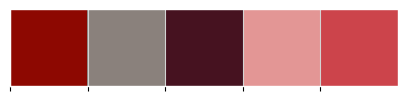

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

# Modeling.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Utils.
from src.eda_utils import *
from src.modelling_utils import *

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.grid']           = True
#mpl.rcParams['figure.dpi']          = 150

# Palette Seting
instyle_palette = ['#8d0801', '#8a817c', '#461220', '#e39695', '#cc444b']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))

#### 3.1.0 Collecting the data
- The data contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and the latest payment information. 
- It is much more clean after the data cleaning task performed, including most of the relevant variables in its correct data types, some missing and outlier values already treat and reduced memory usage in a parquet file. Thus, in this step I will just quickly assess remaining missing values and other necessary treatments to be made in the preprocessing.
- This include consumer loans, as explained above in Lending Club's services, and encompasses data available at the moment of the application. Thus, it will be used to build an application model.

In [2]:
parquet_file_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/large_files/clean_loan_data_2007_2014.parquet'
df = pd.read_parquet(parquet_file_path)

In [278]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,default
0,25000,25000,36,11.89,829.099976,B,B4,0,RENT,85000.0,Verified,2009-08-01,debt_consolidation,CA,19.480000,0,0,NaN,10,0,28854,52.099998,42,f,0.0,29324.320312,25000.000000,4324.319824,0.000000,0.000000,0.000000,7392.080078,0.0,0,NaN,NaN,NaN,281,1
1,1000,1000,36,16.08,35.200001,F,F2,0,RENT,30000.0,Not Verified,2008-07-01,debt_consolidation,IL,23.840000,0,1,NaN,9,0,10125,90.400002,15,f,0.0,1207.760010,999.989990,207.770004,0.000000,0.000000,0.000000,538.969971,0.0,0,NaN,NaN,NaN,192,1
2,7000,7000,36,10.71,228.220001,B,B5,0,RENT,65000.0,Not Verified,2008-05-01,credit_card,NY,14.290000,0,0,NaN,7,0,33623,76.699997,7,f,0.0,8215.450195,7000.000000,1215.449951,0.000000,0.000000,0.000000,228.479996,0.0,0,NaN,NaN,NaN,202,1
3,7000,7000,36,16.08,246.380005,F,F2,10,MORTGAGE,189500.0,Verified,2008-04-01,debt_consolidation,CA,22.469999,0,4,0.0,16,0,150971,92.300003,31,f,0.0,1231.900024,783.460022,448.190002,0.000000,0.250000,0.045000,246.380005,0.0,0,NaN,NaN,NaN,347,0
4,25000,25000,36,16.99,891.200012,D,D3,1,RENT,70000.0,Verified,2014-08-01,debt_consolidation,NY,10.500000,0,0,41.0,10,0,19878,66.300003,17,f,0.0,6073.100098,1634.650024,1038.949951,44.560001,3354.939941,603.889221,935.760010,0.0,0,0.0,34561.0,30000.0,206,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466256 entries, 0 to 466284
Data columns (total 39 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   loan_amnt                    int32         
 1   funded_amnt                  int32         
 2   term                         int8          
 3   int_rate                     float32       
 4   installment                  float32       
 5   grade                        category      
 6   sub_grade                    category      
 7   emp_length                   int16         
 8   home_ownership               category      
 9   annual_inc                   float32       
 10  verification_status          category      
 11  issue_d                      datetime64[ns]
 12  purpose                      category      
 13  addr_state                   category      
 14  dti                          float32       
 15  delinq_2yrs                  int16         
 16  inq_las

- It is possible to see that the variables are in the correct data types, with optimized memory usage.

In [280]:
missing_df = df.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
missing_df['pct'] = round(missing_df['count'] / df.shape[0] * 100, 3)
missing_df.head(10)

,count,pct
mths_since_last_delinq,250322,53.688
total_rev_hi_lim,70247,15.066
tot_cur_bal,70247,15.066
tot_coll_amt,70247,15.066
revol_util,311,0.067
collections_12_mths_ex_med,116,0.025
total_rec_int,0,0.000
total_acc,0,0.000
initial_list_status,0,0.000
out_prncp,0,0.000


- It is possible to see that there are some remaining missing values that will require treatment in the preprocessing step.


#### 3.1.1 What will our PD model be?
- The PD Model will be a Logistic Regression with dummy variables, that is, variables that indicate 1 whether a category is present, else 0. This is because the CEO wants us to build an interpretable model. It is important to make customers happy and explain why the model makes certain decisions, such as approving or denying a loan, especially in the online environment.
- The PD model is interpretable because it estimates a linear regression score as the log-odds. The log-odds is the logarithm of the ratio of the probability of being a good borrower and the probability of being a bad borrower:

    - $ \ln\left(\frac{P(Y=1)}{P(Y=0)}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_mX_m $.

- If we take the exponential on both sides of the equation, we get the odds of being a good borrower:

    - $ \frac{P(Y=1)}{P(Y=0)} = \exp(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_mX_m) $.

- Now, considering we are constructing only dummy variables, each variable value represented by $X_1$, $X_2$, ..., $X_m$ can only assume either 0 or 1. Let's look at the variable $X_1$, for example.
- The difference between the log-odds of being good when $X_1=1$ and $X_1=0$ will be:

     - $ \ln\left(\frac{P(Y=1|X_1=1)}{P(Y=0)|X_1=1}\right) - \ln\left(\frac{P(Y=1|X_1=0)}{P(Y=0)|X_1=0}\right) = \beta_1 = ( \cancel{\beta_0} + \cancel{\beta_2X_2} + ... + \cancel{\beta_mX_m} + \beta_1 \cdot 1 ) - ( \cancel{\beta_0} + \cancel{\beta_2X_2} + ... + \cancel{\beta_mX_m} + \beta_1 \cdot 0 ) $

- Which is equal to:

    - $ \ln\left(\frac{P(Y=1|X_1=1)}{P(Y=0)|X_1=1}\right) - \ln\left(\frac{P(Y=1|X_1=0)}{P(Y=0)|X_1=0}\right) = \beta_1 $.

- Considering the difference of logs is the ratio of logs, we have:

    - $ \frac{\ln\left(\frac{P(Y=1|X_1=1)}{P(Y=0)|X_1=1}\right)}{\ln\left(\frac{P(Y=1|X_1=0)}{P(Y=0)|X_1=0}\right)} = \beta_1 $.

- And, taking the exponential, we have:

    - $ \frac{\text{odds}(Y=1|X_1=1)}{\text{odds}(Y=1|X_1=0)} = \exp(\beta_1) $.

- And wow! The odds of being good when $X_1$ is equal to 1 is $\exp(\beta_1)$ times the odds of being good when $X_1$ is equal to 0!

    - $ \text{odds}(Y=1|X_1=1) = \exp(\beta_1) \times \text{odds}(Y=1|X_1=0) $.
    
- That is why our PD Model is easily interpretable. We can directly assess the odds of being good increase/decrease when an applicant shows a certain characteristic. A possible example would be "The odds of being good for borrowers with A grade is x times the odds of being good for borrowers with G grade".
Not only can this comparison be made directly with the reference category, but we can also compare to any pair of categories belonging to the same original independent variable. If we want to see the odds of being good increase/decrease when an applicant has characteristic x compared to a characteristic y, we just multiply the odds with y to $\exp(\beta_x - \beta_y)$!
- An important observation is that these pair comparisons can only be made between categories belonging to the same original independent variable because they are mutually exclusive. It doesn't make sense to compare the odds of being good for a customer who has grade A to the odds of being good for a customer with 0 employee length. Of course, an A grade applicant can present 0 years of professional experience!

#### 3.2.0 Data preprocessing
- In this step, I will apply the preprocessing required for estimating our PD Model.
- The PD Model will be a Logistic Regression with dummy variables because interpretability is required. We need to understand why the model makes certain decisions, including the reasons for granting or denying a loan.
- I will remove some variables like collections_12_mths_ex_med because they will not be available at the moment of prediction. By doing this, we avoid data leakage. Moreover, there are other variables that will be removed because I saw in the EDA step that they present either a high imbalance or no discriminatory power.
- I will remove the variable tot_rev_hi_lim because, in the EDA step, I observed it is highly positively correlated with revol_bal. Considering revol_bal does not have any missing values, I decided to keep it. It is important to remove highly correlated features before estimating our PD Model because it can lead to multicollinearity issues, affecting the coefficient estimation.
- It is necessary to impute missing values in mths_since_last_delinq and tot_cur_bal. I will investigate their distributions and assess whether there is a pattern in missing occurrences, that is, these records are missing not at random (MNAR), or if these records are missing completely at random (MCAR).
- Once we construct dummy variables, it will not be necessary to apply feature scaling. One-hot encoding the features already scales them, assigning values of either 0 or 1.
- In the EDA, we defined how the dummies would be constructed. That is, we observed the discriminatory power of each independent variable's categories to determine which would be the final categories for creating dummies. Essentially, we combined categories with similar discriminatory power (based on Weight of Evidence (WoE)), while balancing the number of observations falling into them. We did this to reduce the final dimensionality, improving our PD model's performance. The same approach was applied to continuous features, where we first applied feature discretization, observing the WoE across the ordered discretized bins. Therefore, now that the final categories are already determined, I will perform the same process here (feature discretization and categories combining), finally constructing the dummies we pre-determined and obtaining the prepared data for modeling.

In [281]:
# Investigating missing values in mths_since_last_delinq.
df['mths_since_last_delinq'].describe()

count    215934.000000
mean         34.104431
std          21.778486
min           0.000000
25%          16.000000
50%          31.000000
75%          49.000000
max         188.000000
Name: mths_since_last_delinq, dtype: float64

- The missing values don't represent zero because they are already part of the variable values.

In [282]:
# Investigating missing values pattern in mths_since_last_delinq.
last_delinq_na = df.loc[df['mths_since_last_delinq'].isna()]
last_delinq_na['default'].value_counts(normalize=True)

default
1    0.889418
0    0.110582
Name: proportion, dtype: float64

- The missing values don't show patterns regarding default occurrence. A similar default rate is observed when compared to the whole dataset.
- Considering that we saw in the EDA step that borrowers with a lower number of months since the last delinquency tend to present higher credit risk, including those with a value of 0, indicating a period of less than one month, we can infer that the missing values represent borrowers who were never delinquent.
- Thus, I will create a dummy for these missing values, indicating borrowers who were never delinquent. Imputing with mean/median would introduce bias to the model and would not be a realistic approach.

In [283]:
# Investigating missing values in tot_cur_bal.
df['tot_cur_bal'].describe()

count    3.960090e+05
mean     1.388017e+05
std      1.521147e+05
min      0.000000e+00
25%      2.861800e+04
50%      8.153900e+04
75%      2.089530e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

- The missing values don't represent zero because they are already part of the variable values.

In [284]:
# Investigating missing values pattern in tot_cur_bal.
tot_cur_bal_na = df.loc[df['tot_cur_bal'].isna()]
tot_cur_bal_na['default'].value_counts(normalize=True)

default
1    0.844605
0    0.155395
Name: proportion, dtype: float64

- It is evident that the bad rate is higher for observations with missing values in the total current balance. Considering this, we will treat these missing values as another category of this variable, creating a dummy variable for them. Imputing would not be the best approach, since the variable is extremely right-skewed, affecting both mean and median, and introducing bias to our model because the default event is not random in this case. Moreover, this missing category will be the new reference category for tot_cur_bal, once it presents a default rate and a credit risk even higher than the others observed in the eda notebook.

- Dropping variables that would introduce data leakage and irrelevant variables.

In [4]:
data_leakage_features = ['funded_amnt', 'installment', 'revol_util', 
                         'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 
                         'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                         'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt']
irrelevant_features = ['delinq_2yrs', 'acc_now_delinq', 'pub_rec', 'total_rev_hi_lim']
to_drop = data_leakage_features + irrelevant_features
df = df.drop(columns=to_drop)
df.shape

(466256, 22)

#### 3.2.1 Split the data
- In the context of credit it's important to use an **out-of-time split** instead of an out-of-sample split because we want to understand how well the model, trained with past data, can predict the default of credit applicants in a future time. 
- The data was already sorted in data cleaning task, providing a chronological order for the loans. Thus, we only need to separate the first **80%** of the data for **training** and the remaining **20%** of the data for **testing**.
- I'll split the data first because the **test set** should contain data that the model hasn't encountered before, mimicking a **real-world production scenario.** So, I'll **set it aside now** and only use it for the final evaluation of the model later on.
- Furthermore, it's crucial to fit and transform only the training data to prevent issues like data leakage and overfitting, ensuring a reliable final performance estimate. Test data must only be transformed. Thus, the feature discretization and dummy creation will follow this guideline. That's why I am splitting it before encoding.

In [5]:
# Out-of-time split. 80% training, 20% testing.
train, test = np.split(df, [int(.80 * len(df))])
train['set'] = 'train'
test['set'] = 'test'

In [287]:
# Observing train and test default rates.
print(f"Train default rate: {train['default'].value_counts(normalize=True)}.")
print()
print(f"Test default rate: {test['default'].value_counts(normalize=True)}.")

Train default rate: default
1    0.880151
0    0.119849
Name: proportion, dtype: float64.

Test default rate: default
1    0.932859
0    0.067141
Name: proportion, dtype: float64.


- It is possible to see that test data applicants present a lower default rate.

In [288]:
# Assessing train and test sets dimensions.
print(f'Train set has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test set has {test.shape[0]} rows and {test.shape[1]} columns.')

Train set has 373004 rows and 24 columns.
Test set has 93252 rows and 24 columns.


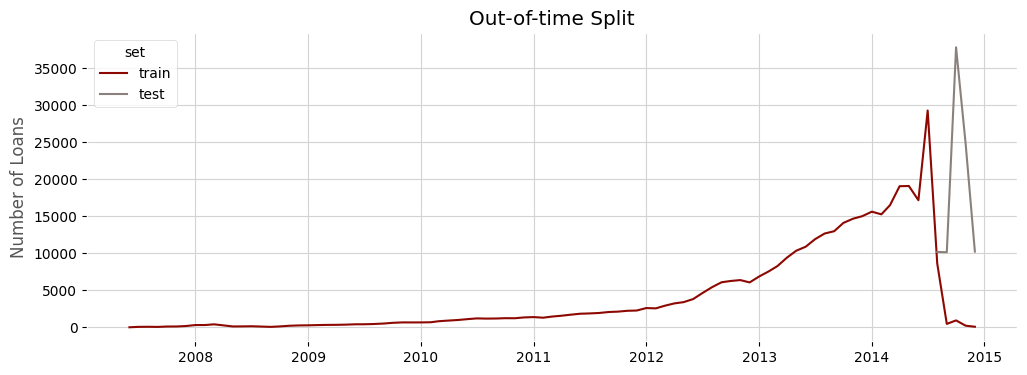

In [6]:
# Plotting the out-of-time split.
train_test = pd.concat([train, test])
train_test = train_test.groupby(['issue_d', 'set'])['default'].count().reset_index().rename(columns={'default': 'loans'})

fig, ax = plt.subplots(figsize=(12, 4))
plt.title('Out-of-time Split')
sns.lineplot(train_test, x='issue_d', y='loans', hue='set', ax=ax)
plt.xlabel('')
plt.ylabel('Number of Loans')
plt.show()

# Dropping columns used only for plotting.
to_drop = ['issue_d', 'set']
train = train.drop(columns=to_drop)
test = test.drop(columns=to_drop)

- The out-of-time split was successfully made.
- It is possible to see an increasing trend for the number of loans over time.

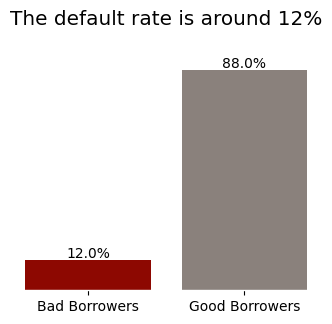

In [290]:
fig, ax = plt.subplots(figsize=(4, 3))

default_grouped = train.groupby(['default'])[['default']].count().rename(columns={'default': 'count'}).reset_index()
default_grouped['pct'] = default_grouped['count'] / default_grouped['count'].sum() * 100

bars = ax.bar(x=default_grouped['default'], height=default_grouped['pct'], color=instyle_palette, width=0.8)
for bar, pct in zip(bars, default_grouped['pct']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')
ax.set_title('The default rate is around 12%', pad=25)
ax.set_xticks(ticks=default_grouped['default'], labels=['Bad Borrowers', 'Good Borrowers'])
ax.yaxis.set_visible(False)
ax.grid(False)

- The default rate is around 12%. This motivates our project, there is indeed space for improvement in Lending Club's credit granting.
- We are dealing with an imbalanced classification problem.

#### 3.2.2 Feature discretization, categories bundling and one-hot encoding
- As I mentioned above, we will perform feature discretization and categories bundling to obtain the dummies by applying one-hot encoding as we determined in the EDA step.
- I will first obtain all final categories by applying feature discretization and categories bundling, and then one-hot encode everything.
- An important observation is that, as it is necessary to create n-1 dummies for each independent variable, the preprocessors built already handle the removal of reference categories. This also applies to the imputation of missing values in 'mths_since_last_delinq' and 'tot_cur_bal,' treating them as 'never_delinquent' or 'missing' categories, followed by the creation of corresponding dummies.
- The preprocessor classess responsible for performing these tasks are contained in the modeling_utils.py file. I have developed preprocessor classes to simplify the preprocessing steps, streamlining the entire process in an organized and modular manner. As we transition to the production environment in the future, a new comprehensive pipeline with more preprocessor components will be constructed, encompassing all the cleaning steps from raw data collection to now.
- The whole same process applied to training will be applied to testing, transforming it.

In [7]:
# Obtaining predictor and target train and test sets.
X_train = train.drop(columns=['default'])
y_train = train['default'].copy()
X_test = test.drop(columns=['default'])
y_test = test['default'].copy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((373004, 20), (373004,), (93252, 20), (93252,))

In [8]:
# Preprocessing the train and test sets.

# Constructing a pipeline.
pipe = Pipeline(
    steps=[
        ('discretizer_combiner', DiscretizerCombiner()),
        ('cat_combiner', CatCombiner()),
        ('cat_imputer', CatImputer()),
        ('cat_one_hot_encoder', CatOneHotEncoder())
    ]
) 

X_train_prepared = pipe.fit_transform(X_train)
X_test_prepared = pipe.transform(X_test)
X_train_prepared.shape, X_test_prepared.shape

((373004, 97), (93252, 97))

In [9]:
# Assessing whether we obtained the desired dummies dataframe for the PD modeling.
X_train_prepared.head()

,loan_amnt_14.3K-21.2K,loan_amnt_21.2K-28.1K,loan_amnt_7.4K-14.3K,loan_amnt_<=7.4K,term_36,int_rate_10.0-12.0,int_rate_12.0-14.0,int_rate_14.0-16.0,int_rate_16.0-18.0,int_rate_18.0-22.0,int_rate_7.0-10.0,int_rate_<=7.0,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,sub_grade_A3_A2_A1,sub_grade_A5_A4,sub_grade_B2_B1,sub_grade_B4_B3,sub_grade_C2_C1_B5,sub_grade_C5_C4_C3,sub_grade_D3_D2_D1,sub_grade_E1_D5_D4,sub_grade_E5_F1_E4_E3_E2,emp_length_1-3,emp_length_10,emp_length_4-6,emp_length_7-9,home_ownership_MORTGAGE,home_ownership_OWN,annual_inc_120.0K-150.0K,annual_inc_20.0K-40.0K,annual_inc_40.0K-60.0K,annual_inc_60.0K-75.0K,annual_inc_75.0K-90.0K,annual_inc_90.0K-120.0K,annual_inc_>150.0K,verification_status_Not Verified,verification_status_Source Verified,purpose_credit_card,purpose_debt_consolidation,purpose_other_house_medical_vacation,purpose_wedding_home_improvement_major_purchase_car,addr_state_AL_NM_NJ,addr_state_AR_TN_MI_UT_VA_LA_PA_AZ_OH_RI_KY_DE_IN,addr_state_CA,addr_state_MA_SD_GA_MN_WI_WA_OR_IL_CT,addr_state_MS_MT_SC_VT_KS_CO_AK_NH_WV_WY_ID_DC_ME,addr_state_NY,addr_state_OK_MO_MD_NC,addr_state_TX,dti_12.0-16.0,dti_16.0-20.0,dti_20.0-28.0,dti_4.0-8.0,dti_8.0-12.0,dti_<=4.0,inq_last_6mths_0,inq_last_6mths_1,inq_last_6mths_2,inq_last_6mths_3,mths_since_last_delinq_22.0-37.0,mths_since_last_delinq_37.0-74.0,mths_since_last_delinq_4.0-7.0,mths_since_last_delinq_7.0-22.0,mths_since_last_delinq_>74.0,mths_since_last_delinq_never_delinquent,open_acc_12.0-21.0,open_acc_6.0-12.0,open_acc_>21.0,revol_bal_12.0K-22.0K,revol_bal_2.0K-6.0K,revol_bal_22.0K-30.0K,revol_bal_30.0K-36.0K,revol_bal_36.0K-40.0K,revol_bal_6.0K-12.0K,revol_bal_>40.0K,total_acc_15.0-24.0,total_acc_24.0-36.0,total_acc_8.0-15.0,total_acc_>36.0,initial_list_status_w,tot_cur_bal_140.0K-200.0K,tot_cur_bal_200.0K-240.0K,tot_cur_bal_240.0K-280.0K,tot_cur_bal_280.0K-340.0K,tot_cur_bal_340.0K-400.0K,tot_cur_bal_80.0K-140.0K,tot_cur_bal_<=80.0K,tot_cur_bal_>400.0K,mths_since_earliest_cr_line_151.0-226.0,mths_since_earliest_cr_line_226.0-276.0,mths_since_earliest_cr_line_276.0-401.0,mths_since_earliest_cr_line_>401.0
0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


- Great! The preprocessing with feature discretization, categories bundling based on WoE and the number of observations, and final dummy construction was successful.

In [11]:
# Obtaining the reference categories for further interpretation.
one_hot_encoder_reference_categories = pipe.named_steps['cat_one_hot_encoder'].reference_categories
one_hot_encoder_reference_categories

['>28.1K',
 '60',
 '>22.0',
 'G',
 'G1_F5_G5_G3_G2_F4_F3_G4_F2',
 '0',
 'OTHER_NONE_RENT_ANY',
 '<=20.0K',
 'Verified',
 'small_business_educational_renewable_energy_moving',
 'NE_IA_NV_HI_FL',
 '>28.0',
 '4-33',
 '<=4.0',
 '<=6.0',
 '<=2.0K',
 '<=8.0',
 'f',
 'missing',
 '<=151.0']

#### 3.3 Estimating the PD Model